Generate and train model on cifar dataset

In [ ]:
### https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
!nvidia-smi

Sun Feb 12 14:51:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
# normalise data -> make the numbers smaller for better results
import numpy as np

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

[1]


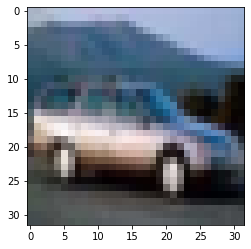

In [8]:
print(y_train[4])
plt.imshow(x_train[4])
plt.show()

In [9]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu", padding="same"))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# get true if car else false
y_train = y_train == 1

# Generate more traning data with change of pixels, zoom, etc.
from keras.preprocessing.image import ImageDataGenerator
import math

gen = ImageDataGenerator(width_shift_range=3, height_shift_range=3, zoom_range=0.1, horizontal_flip=True)

model.fit_generator(gen.flow(x_train, y_train, batch_size=128, shuffle=True), steps_per_epoch=math.ceil(len(x_train)/128), epochs=10, workers=8)

<ipython-input-11-572c0e35c2d0>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(gen.flow(x_train, y_train, batch_size=128, shuffle=True), steps_per_epoch=math.ceil(len(x_train)/128), epochs=10, workers=8)


Epoch 1/10
391/391 [==============================] - 51s 99ms/step - loss: 0.2908 - accuracy: 0.9004
Epoch 2/10
391/391 [==============================] - 42s 106ms/step - loss: 0.2086 - accuracy: 0.9163
Epoch 3/10
391/391 [==============================] - 41s 104ms/step - loss: 0.1702 - accuracy: 0.9326
Epoch 4/10
391/391 [==============================] - 40s 101ms/step - loss: 0.1408 - accuracy: 0.9469
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 0.1208 - accuracy: 0.9547
Epoch 6/10
391/391 [==============================] - 46s 115ms/step - loss: 0.1050 - accuracy: 0.9626
Epoch 7/10
391/391 [==============================] - 45s 113ms/step - loss: 0.0922 - accuracy: 0.9669
Epoch 8/10
391/391 [==============================] - 43s 108ms/step - loss: 0.0847 - accuracy: 0.9700
Epoch 9/10
391/391 [==============================] - 40s 100ms/step - loss: 0.0774 - accuracy: 0.9730
Epoch 10/10
391/391 [==============================] - 43s 108ms/step - lo

In [13]:
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.0490 - accuracy: 0.9834


[0.0490286685526371, 0.9834200143814087]

In [14]:
# get true if car else false
y_test = y_test == 1

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0619 - accuracy: 0.9796


[0.06186589226126671, 0.9796000123023987]

[ True]


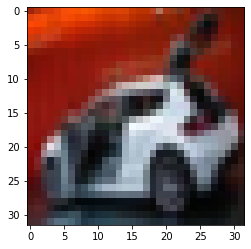

In [150]:
import matplotlib.pyplot as plt

print(y_test[6])
plt.imshow(x_test[6])
plt.show()

In [16]:
p = x_test[6].reshape(1,32,32,3)
p.shape

(1, 32, 32, 3)

In [17]:
model.predict(p)

1/1 [==============================] - 1s 521ms/step


array([[0.809034]], dtype=float32)

Use image and mark car position

In [63]:
from PIL import Image, ImageDraw
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


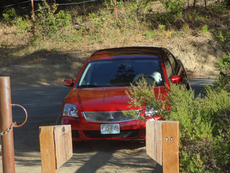

In [184]:
img = Image.open("drive/MyDrive/NeuralNetwork/bild1.jpg");
# resize image, make it 10x smaller
img = img.resize((round(img.size[0] / 10), round(img.size[1] / 10)), resample=Image.LANCZOS)
img

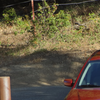

In [185]:
# example on how to take a specific part of the picture out -> needed to check where the car is located
img_test = img.crop((0, 0, 100, 100))
img_test

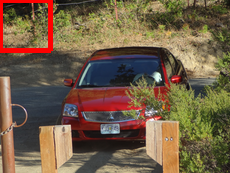

In [186]:
# example on how to make a rectangle on the image
points = [
    (0, 0),
    (0, 50),
    (50, 50),
    (50, 0),
    (0, 0)
]

img_test = img.copy()

draw_test = ImageDraw.Draw(img_test)
draw_test.line(points, "red", 5)

img_test

1/1 [==============================] - 0s 23ms/step


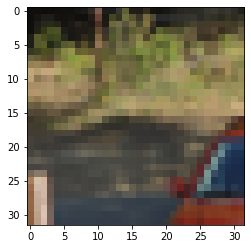

1/1 [==============================] - 0s 20ms/step


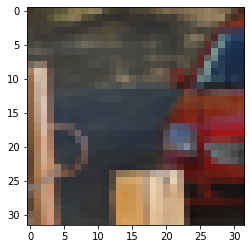

1/1 [==============================] - 0s 22ms/step


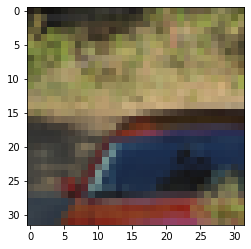

1/1 [==============================] - 0s 20ms/step


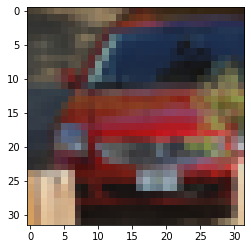

1/1 [==============================] - 0s 22ms/step


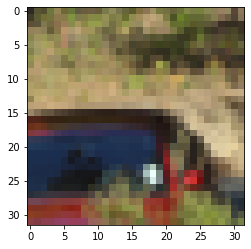

1/1 [==============================] - 0s 22ms/step


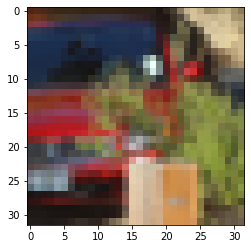

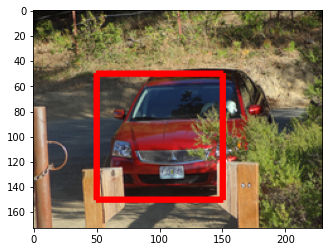

In [187]:
%matplotlib inline

size = 100
step_size = 50

results = []

# take small parts of the picture and iterrate over it with a defined size and steps
# check on every part of the picture if a car is visible or not
for x in range(0, img.size[0] - size, step_size):
  for y in range(0, img.size[1] - size, step_size):
    # crop is used to take a part of the picture out
    part = img.crop((x, y, x + size, y + size))
    # generate numpy array and normalise data for model
    data = np.asarray(part.resize((32, 32), resample=Image.BICUBIC))
    data = data.astype(np.float32) / 255.
    pred = model.predict(data.reshape(1,32,32,3))
    plt.imshow(data)
    plt.show()
    if (pred > 0.8):
      results.append((x, y))

out = img.copy()
draw_out = ImageDraw.Draw(out)

for result in results:
  # generate lines to displaye the car on the found positions
  points = [
    result,
    (result[0], result[1] + size),
    (result[0] + size, result[1] + size),
    (result[0] + size, result[1]),
    result
  ]
  draw_out.line(points, "red", 5)

plt.imshow(out)
plt.show()